In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]
numerical_features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [9]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]
discrete_features

['sepal_width', 'petal_width']

In [11]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['sepal_length', 'petal_length']

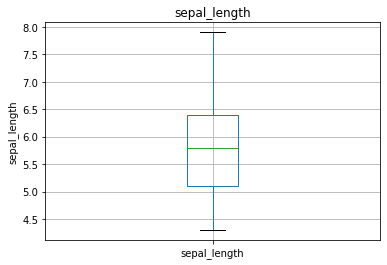

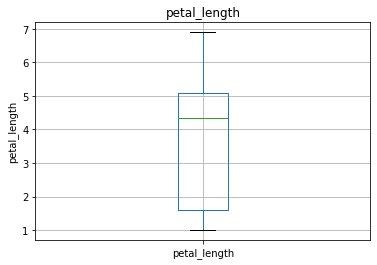

In [14]:
for feature in continuous_features:
    data1= data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [15]:
x = data.drop(["species"], axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y = data["species"]

In [17]:
from sklearn.model_selection import train_test_split


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=0)

In [21]:
x_train.shape


(105, 4)

In [22]:
x_test.shape

(45, 4)

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
naive_bayes = GaussianNB()

In [25]:
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [26]:
y_pred = naive_bayes.predict(x_test)

In [27]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [28]:
from sklearn import metrics

In [29]:
cnf_metrics = metrics.confusion_matrix(y_test, y_pred)
cnf_metrics

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

In [30]:
print("Accuracy: ", metrics.accuracy_score(y_pred, y_test))

Accuracy:  1.0
